In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data file.csv')
pd.set_option('display.max_columns', None)
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In [3]:
df.shape

(209593, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

Observation:

    We can see that there are only 3 objects, which are pcircle, pdate and msidn.

    Msidn is irrelevant to the model we create as it's unique for everyone
    Date is also irrelevant to the model as the fraud status doesn't depend on the date of onboarding.
    We will have to check the pcircle. 

In [5]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

Observation:

    Since there is only one type of variable in the whole column, we can remove it. 

In [6]:
df_drop = ['Unnamed: 0', 'msisdn', 'pdate', 'pcircle']
for i in df_drop: 
    df.drop(i, axis = 1, inplace = True)

In [7]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

In [8]:
df.nunique()

label                        2
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback30                 1363
payback9

Observation:

    Label is the output variable.

    There are less number of values for multiple columns. We will have to check the correlation plot of these columns to find which ones are worth keeping. 

### Plotting the variables to make better sense of the data

<AxesSubplot:xlabel='aon', ylabel='daily_decr30'>

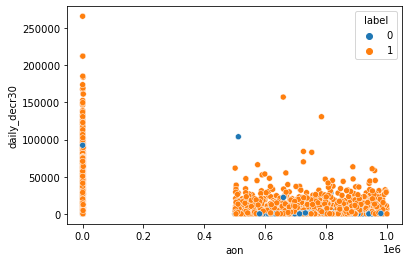

In [9]:
sns.scatterplot(data = df, x="aon", y="daily_decr30", hue="label")

In [10]:
# From this graph, we can see that there are a lot of people who doesn't recharge their accounts. 
# Plot between average age on the network vs daily amount spend in the last 30 days. 
# There are outliers in this data. 

<AxesSubplot:xlabel='rental30', ylabel='daily_decr30'>

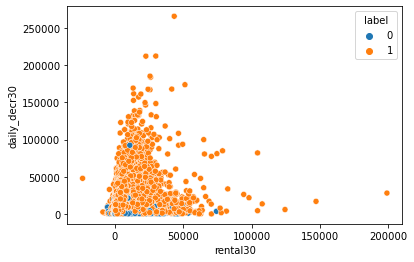

In [11]:
sns.scatterplot(data = df, x="rental30", y="daily_decr30", hue="label")

In [12]:
# This plot show that the highest number of people subscribing to the plans are spending the amount form the balnces on an occasional basis. 
# Plot between average main account balance vs daily amount spent on the account. 
# There are outliers in the data. 

<AxesSubplot:xlabel='daily_decr90', ylabel='daily_decr30'>

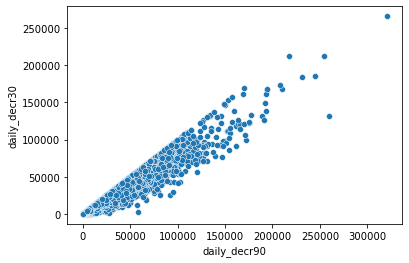

In [13]:
sns.scatterplot(data = df, x="daily_decr90", y="daily_decr30")

In [14]:
# There seems to be an incremental increase in the daily amount spent from main account in 30 vs 90 days. 
# There also seems to be outliers in this details. 

<AxesSubplot:xlabel='rental30', ylabel='rental90'>

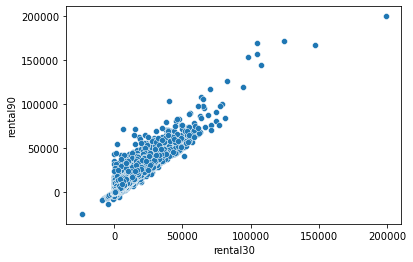

In [15]:
sns.scatterplot(data = df, x="rental30", y="rental90")

In [16]:
# There seems to be an incremental increase in the average main account balance over last 30 vs 90 days. 
# There also seems to be outliers in this details. 

<AxesSubplot:xlabel='cnt_ma_rech30', ylabel='fr_ma_rech30'>

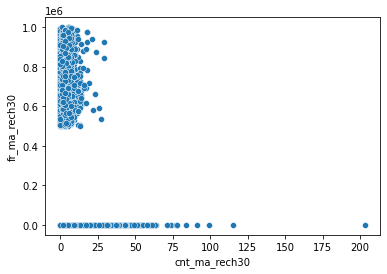

In [17]:
sns.scatterplot(data = df, x="cnt_ma_rech30", y="fr_ma_rech30")

In [18]:
# Again, we can see that there are a lot of people who doesn't recharge their account. 

<AxesSubplot:xlabel='fr_ma_rech90', ylabel='cnt_ma_rech30'>

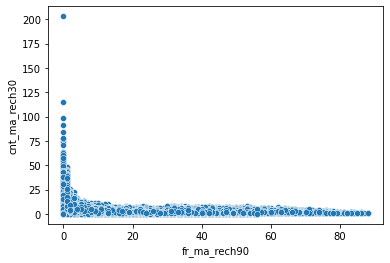

In [19]:
sns.scatterplot(data = df, x="fr_ma_rech90", y="cnt_ma_rech30")

In [20]:
# Frequency vs number of recharges done in the last 30 days.
# There are outliers in this plot. 

<AxesSubplot:xlabel='medianamnt_ma_rech90', ylabel='rental90'>

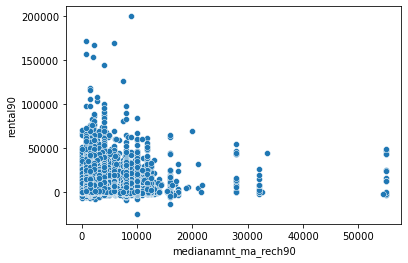

In [21]:
sns.scatterplot(data = df, x="medianamnt_ma_rech90", y="rental90")

In [22]:
# Amount of recharges done in the last 90 days vs average main account balance in the last 90 days. 
# There are outliers in the plot. 

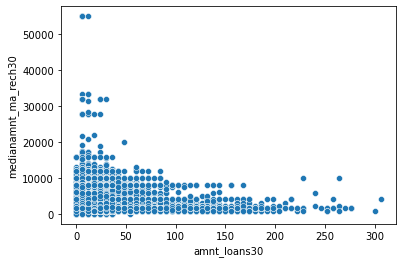

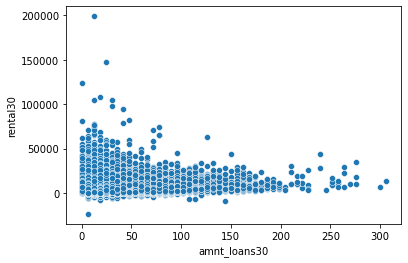

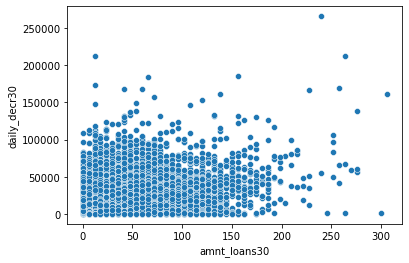

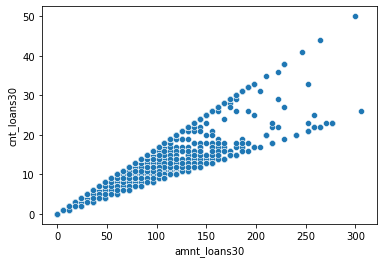

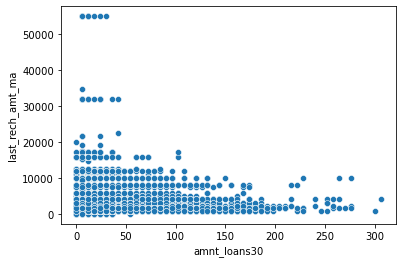

In [23]:
liat = ['medianamnt_ma_rech30', 'rental30', 'daily_decr30', 'cnt_loans30', 'last_rech_amt_ma']   
for i in liat:
    sns.scatterplot(data = df, x = 'amnt_loans30', y = i)
    plt.show()

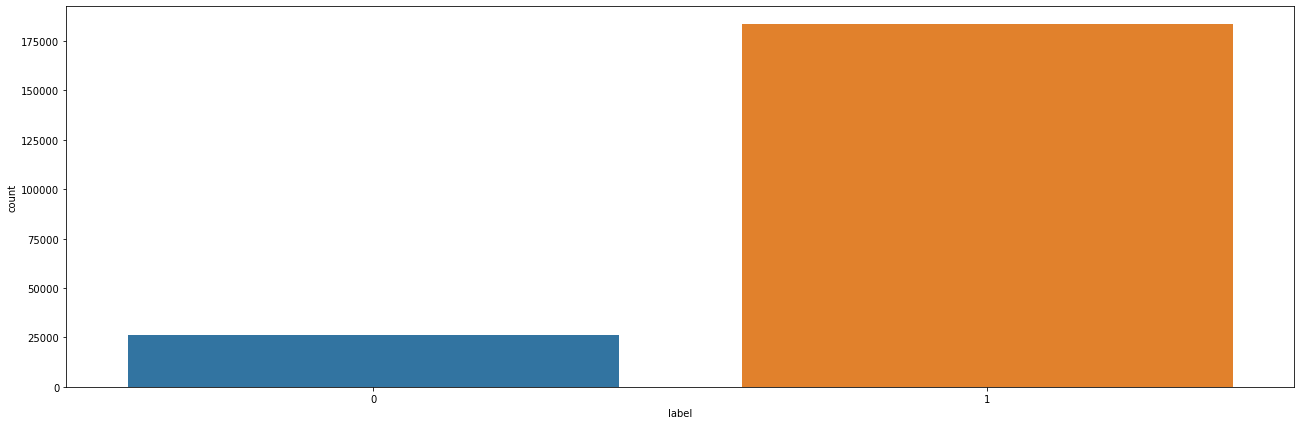

In [24]:
plt.figure(figsize = (22,7))
ax = sns.countplot(x = 'label', data = df)
#print(df[i].value_counts())
plt.show()

In [25]:
# We can see that the data is imbalanced, we'll have to work with that first. 

### Checking the summary of the datatset

In [26]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

<AxesSubplot:>

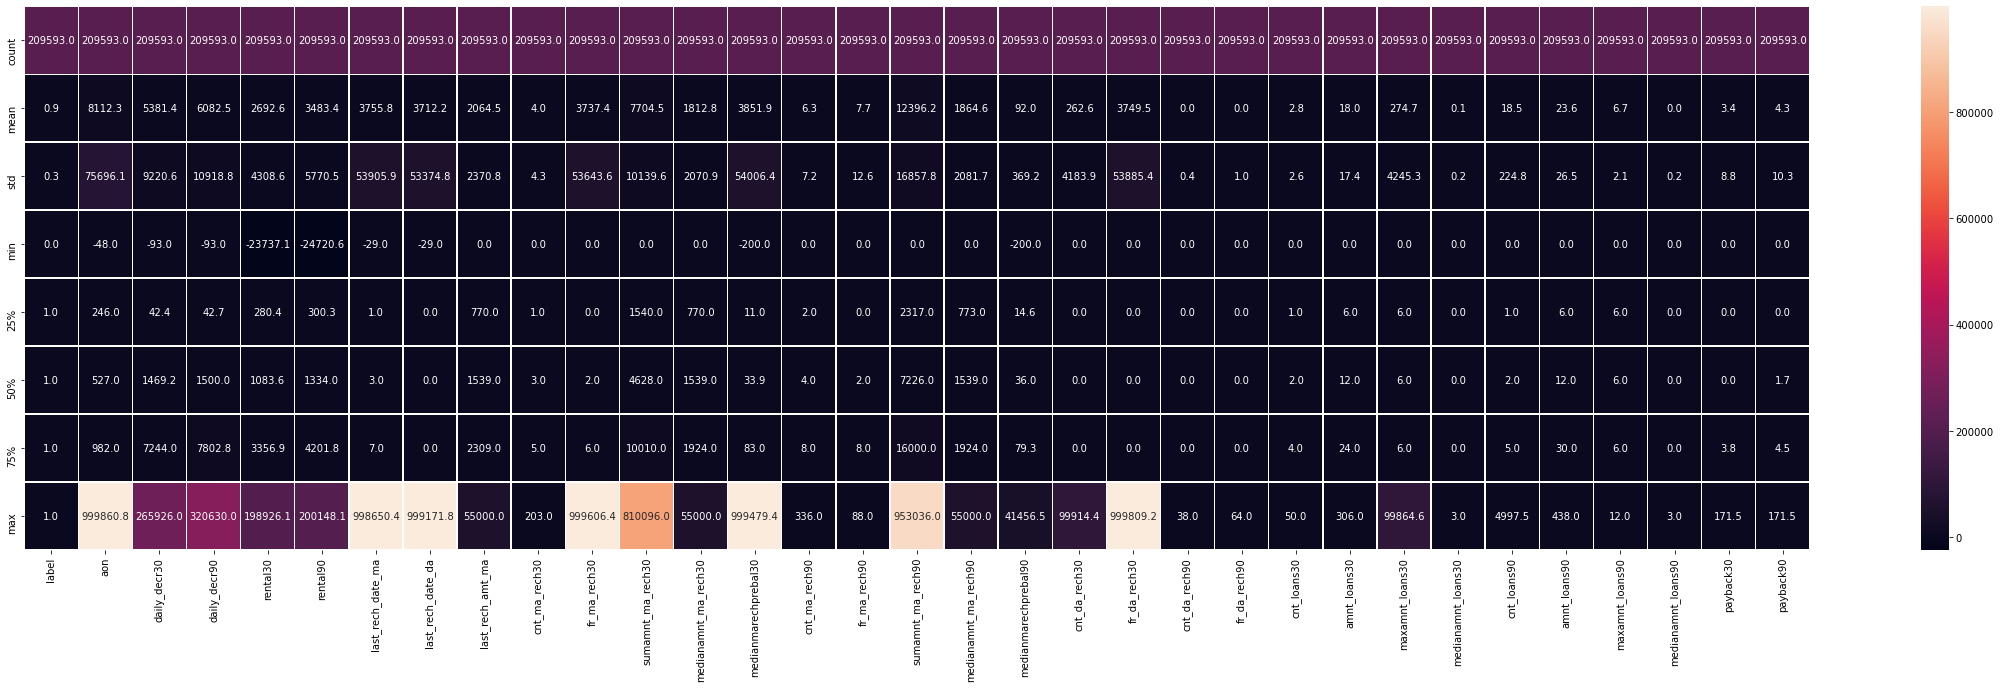

In [27]:
plt.figure(figsize=(40,10))
sns.heatmap(df.describe(), annot = True, fmt = '0.1f', linewidths=.5)

Observation:

    There are multiple rows with significant difference between the mean and max values. This means that there are outliers in the dataset.

### Correlation

In [28]:
df.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002345          -0.003626   
cnt_da_rech90         0.072255  0.056282          -0.003538   
fr_da_rech90          0.046761  0.036886          -0.002395   
cnt_loans30           0.180203  0.171595           0.001193   
a

<AxesSubplot:>

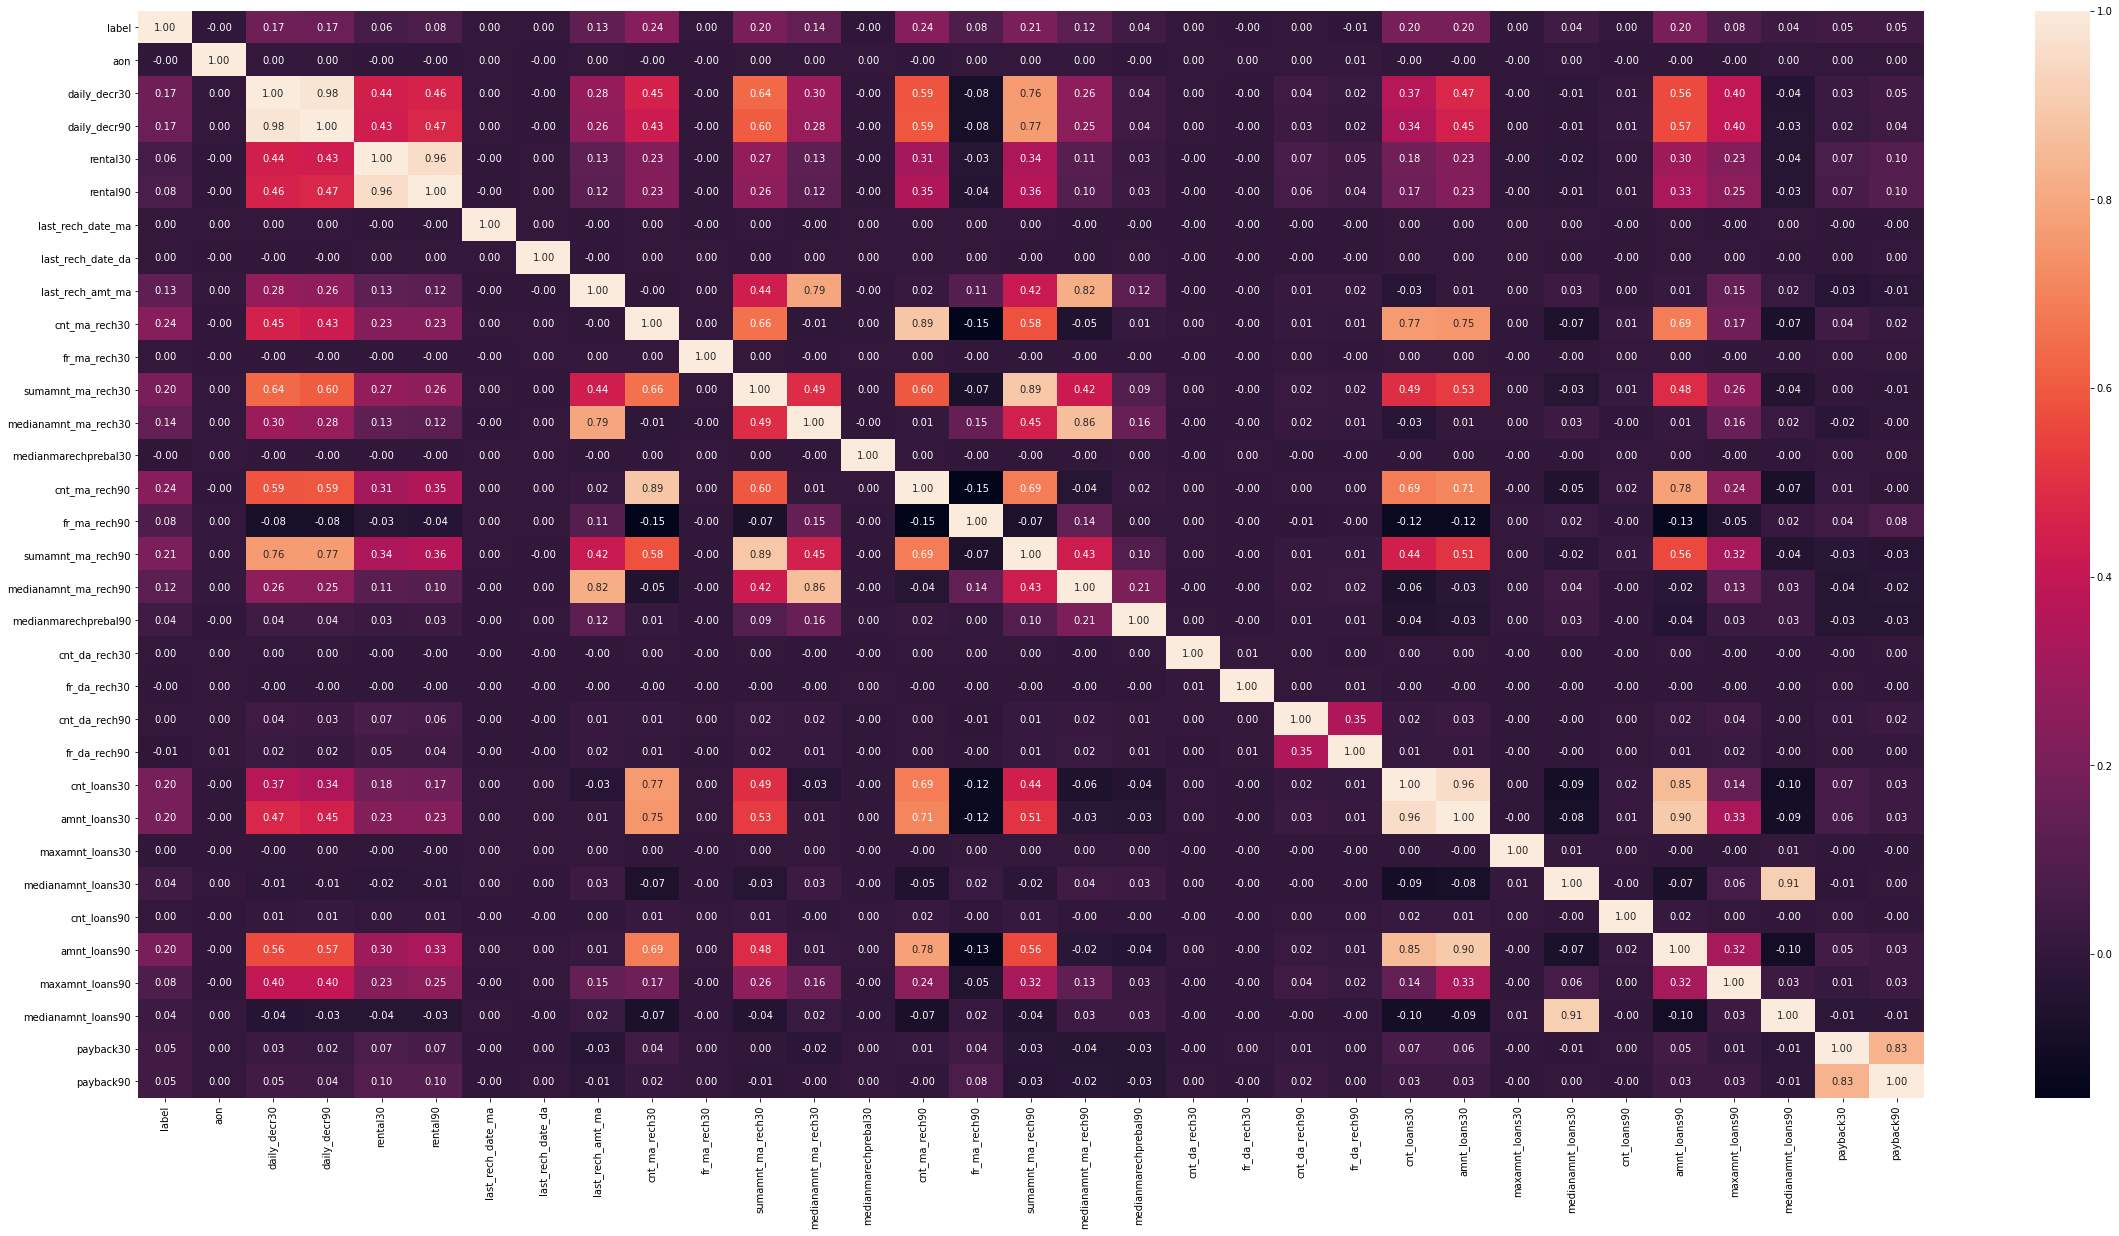

In [29]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f')

Observation:

    We can see that there are multiple columns with 0 correlation with the output variable. Keeping those variables doesn't do any good to the model. 

    There are also columns which has identical correlation. There's no requirement to keep both of those columns. 

In [30]:
# Columns which has 0 correlation with the target variable. 

zero_corr = ['aon', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'medianmarechprebal30', 'cnt_da_rech30',
             'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'maxamnt_loans30', 'cnt_loans90']

In [31]:
for i in zero_corr:
    df.drop(i, axis = 1, inplace = True)

In [32]:
df.head()

label  daily_decr30  daily_decr90  rental30  rental90  last_rech_amt_ma  \
0      0   3055.050000   3065.150000    220.13    260.13              1539   
1      1  12122.000000  12124.750000   3691.26   3691.26              5787   
2      1   1398.000000   1398.000000    900.13    900.13              1539   
3      1     21.228000     21.228000    159.42    159.42               947   
4      1    150.619333    150.619333   1098.90   1098.90              2309   

   cnt_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  \
0              2             3078.0                1539.0              2   
1              1             5787.0                5787.0              1   
2              1             1539.0                1539.0              1   
3              0                0.0                   0.0              1   
4              7            20029.0                2309.0              8   

   fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0            21               3078                1539.0   
1             0               5787                5787.0   
2             0               1539                1539.0   
3             0                947                 947.0   
4             2              23496                2888.0   

   medianmarechprebal90  cnt_loans30  amnt_loans30  medianamnt_loans30  \
0                  7.50            2            12                 0.0   
1                 61.04            1            12                 0.0   
2                 66.32            1             6                 0.0   
3                  2.50            2            12                 0.0   
4                 35.00            7            42                 0.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  
0            12                6                 0.0  29.000000  29.000000  
1            12               12                 0.0   0.000000   0.000000  
2             6                6                 0.0   0.000000   0.000000  
3            12                6                 0.0   0.000000   0.000000  
4            42                6                 0.0   2.333333   2.333333

In [33]:
df.shape

(209593, 22)

<AxesSubplot:>

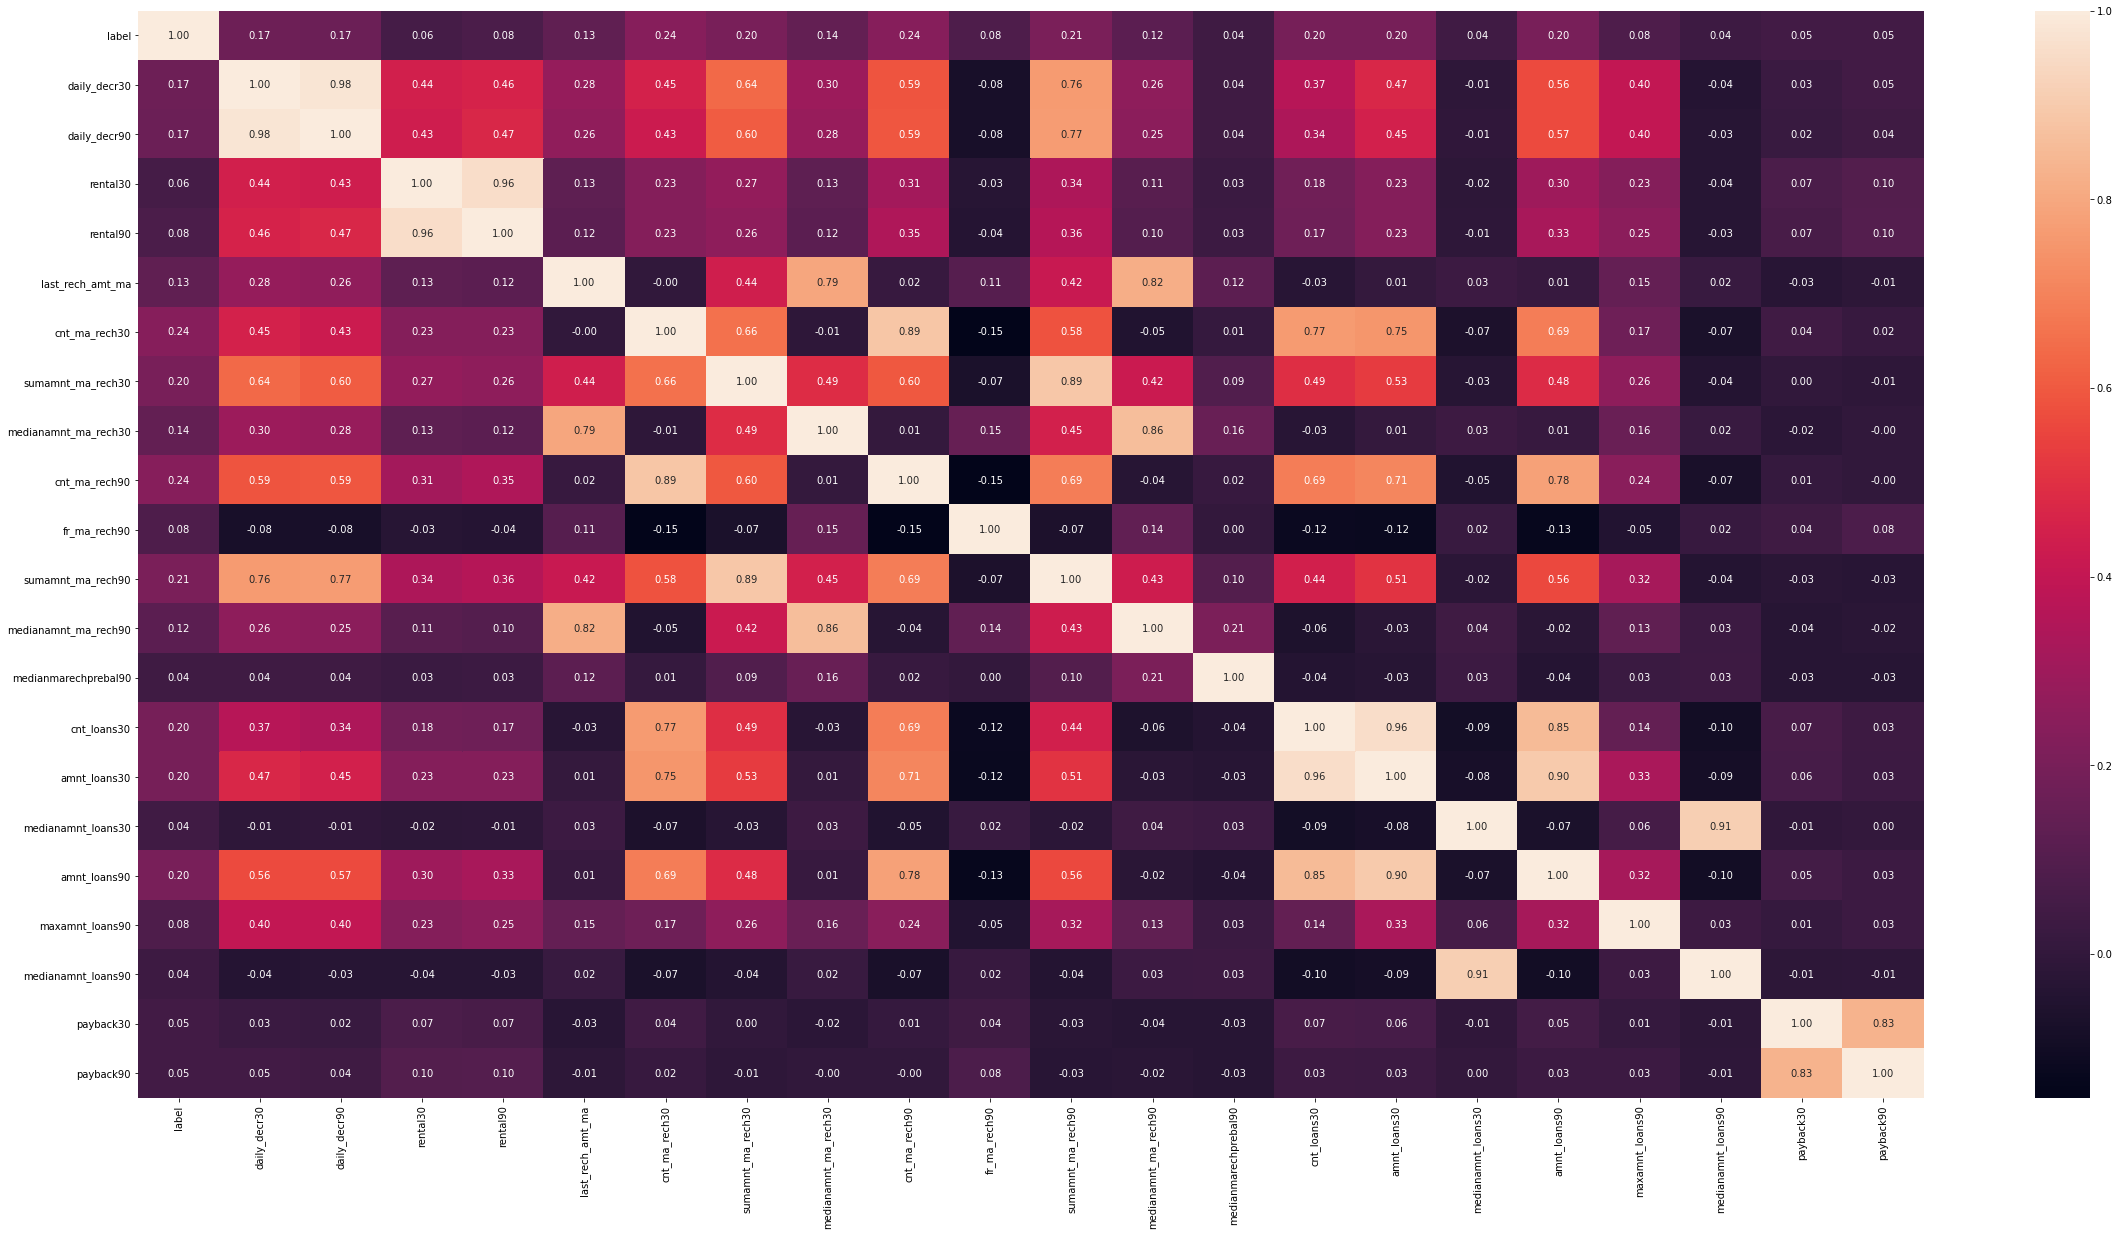

In [34]:
# Plotting the correlation graph once again

plt.figure(figsize=(40,20))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f')

Observation:

    We can see that some of the variables has the same correlation. I'm removing the second columns that has more that 0.95 of correlation. 

    daily_decr30 & daily_decr90 - removing daily_decr30
    rental30 & rental90 - removing rental30
    cnt_loans30 & amnt_loans30 - removing cnt_loans30

In [35]:
dupe_corr = ['daily_decr30', 'rental30', 'cnt_loans30']
for i in dupe_corr:
    df.drop(i, axis = 1, inplace = True)

In [36]:
df.shape

(209593, 19)

In [37]:
df.columns

Index(['label', 'daily_decr90', 'rental90', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'amnt_loans30',
       'medianamnt_loans30', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

### Checking outliers

In [38]:
from scipy.stats import zscore

In [39]:
z = np.abs(zscore(df))
threshold = 3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([ 8,  8, 18, ..., 14, 13, 16], dtype=int64))


In [40]:
dfn = df[(z<3).all(axis=1)]
print(df.shape)
print(dfn.shape)

(209593, 19)
(171960, 19)


In [41]:
# Percentage of data loss.
data_loss = ((209593-171960)/209593)*100
data_loss

17.955275223886293

In [42]:
# Since there are more than 17% of outliers values in the dataset, we cannot use the ZScore to remove the outliers. 

In [43]:
df.describe()

label   daily_decr90       rental90  last_rech_amt_ma  \
count  209593.000000  209593.000000  209593.000000     209593.000000   
mean        0.875177    6082.515068    3483.406534       2064.452797   
std         0.330519   10918.812767    5770.461279       2370.786034   
min         0.000000     -93.012667  -24720.580000          0.000000   
25%         1.000000      42.692000     300.260000        770.000000   
50%         1.000000    1500.000000    1334.000000       1539.000000   
75%         1.000000    7802.790000    4201.790000       2309.000000   
max         1.000000  320630.000000  200148.110000      55000.000000   

       cnt_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   209593.00000   
mean        3.978057        7704.501157           1812.817952        6.31543   
std         4.256090       10139.621714           2070.864620        7.19347   
min         0.000000           0.000000              0.000000        0.00000   
25%         1.000000        1540.000000            770.000000        2.00000   
50%         3.000000        4628.000000           1539.000000        4.00000   
75%         5.000000       10010.000000           1924.000000        8.00000   
max       203.000000      810096.000000          55000.000000      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90   amnt_loans30  medianamnt_loans30   amnt_loans90  \
count         209593.000000  209593.000000       209593.000000  209593.000000   
mean              92.025541      17.952021            0.054029      23.645398   
std              369.215658      17.379741            0.218039      26.469861   
min             -200.000000       0.000000            0.000000       0.000000   
25%               14.600000       6.000000            0.000000       6.000000   
50%               36.000000      12.000000            0.000000      12.000000   
75%               79.310000      24.000000            0.000000      30.000000   
max            41456.500000     306.000000            3.000000     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000

In [44]:
# We can see that the difference between the 75th percentile and max values are too high in most of the columns. 
# There are negative values in rental90 column

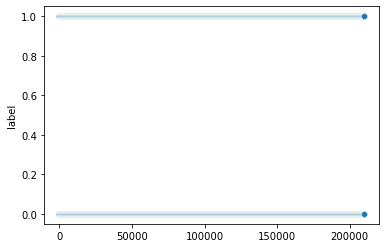

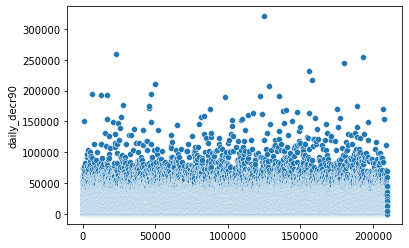

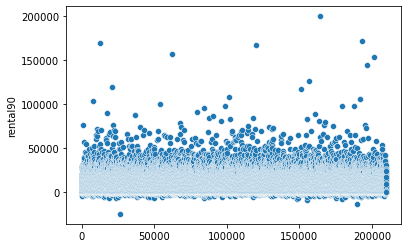

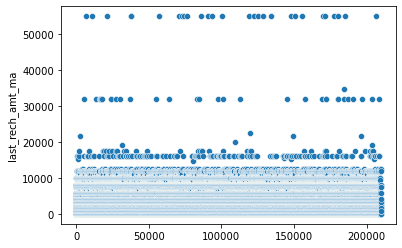

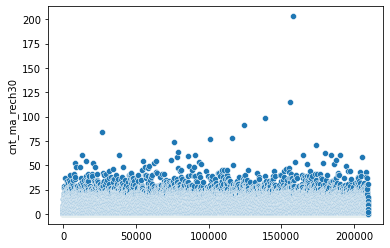

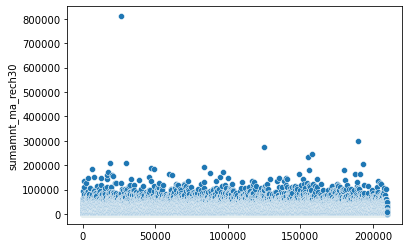

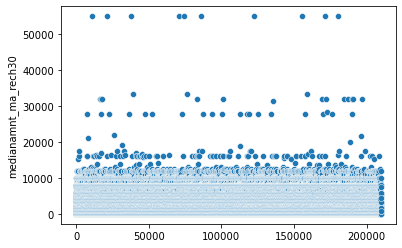

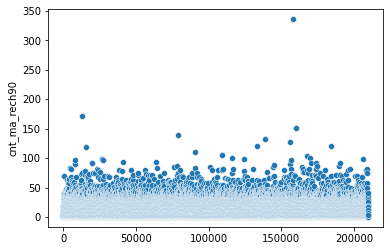

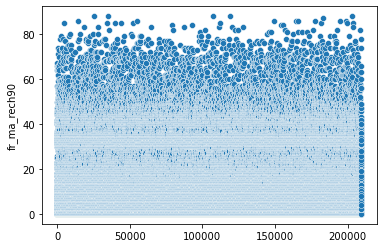

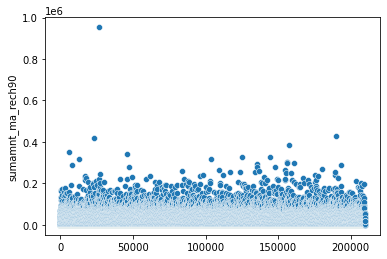

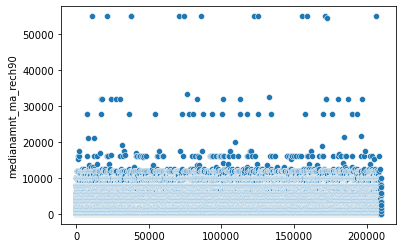

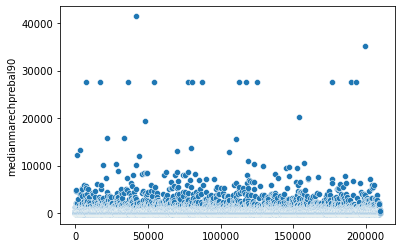

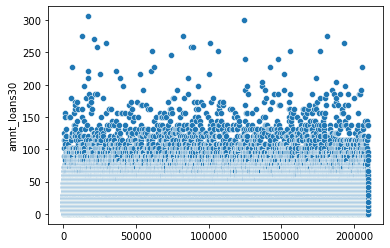

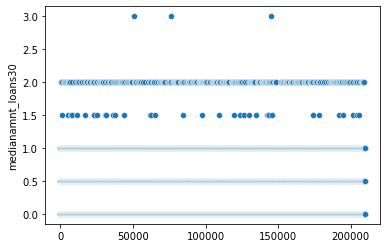

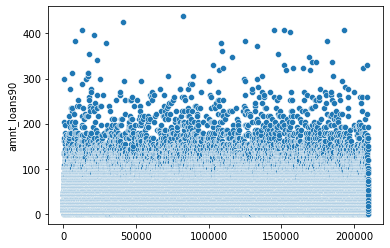

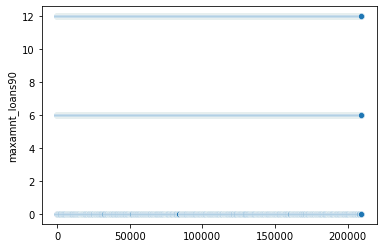

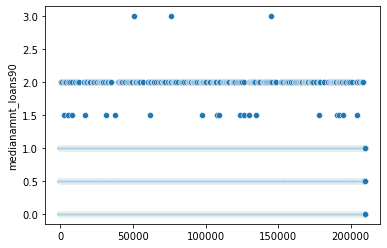

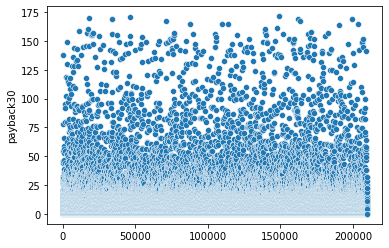

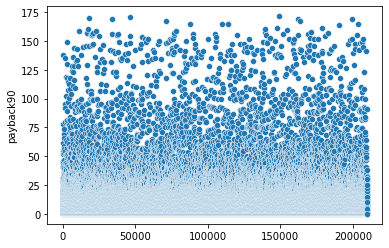

In [45]:
for i in df.columns: 
    sns.scatterplot(x = df.index, y = df[i])
    plt.show()

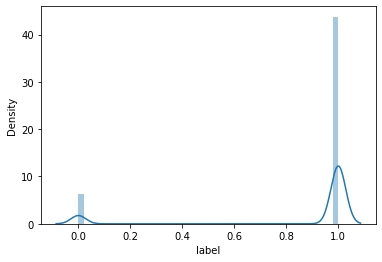

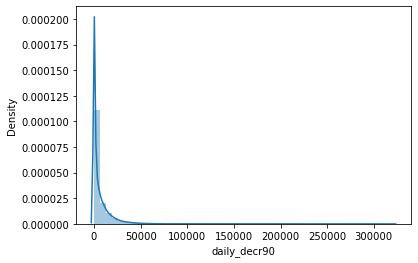

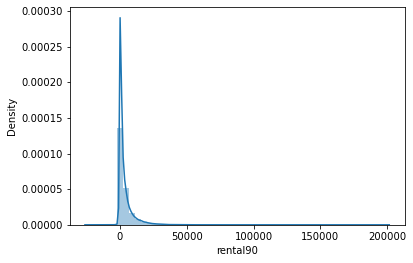

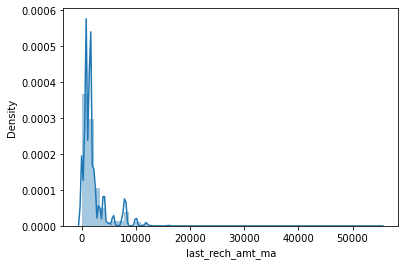

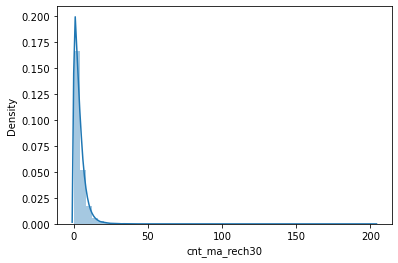

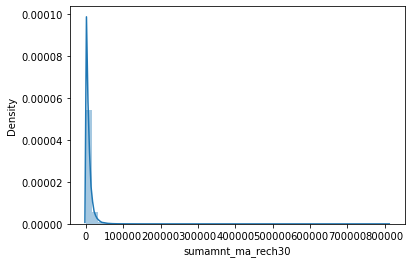

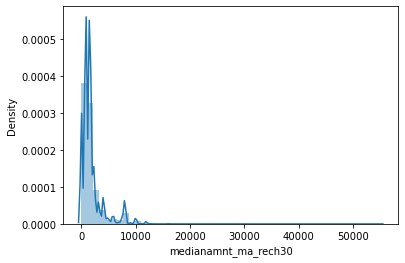

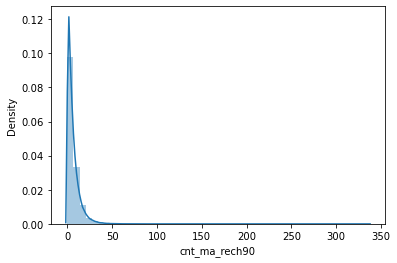

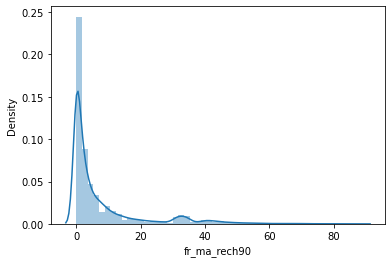

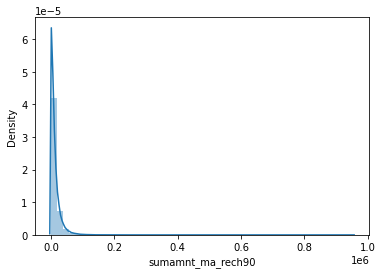

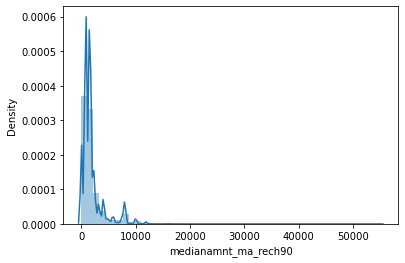

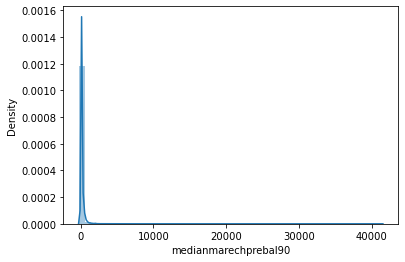

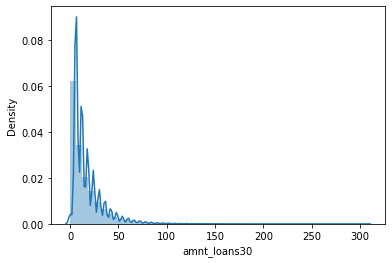

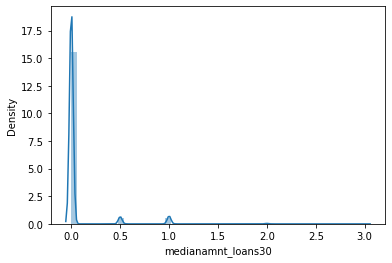

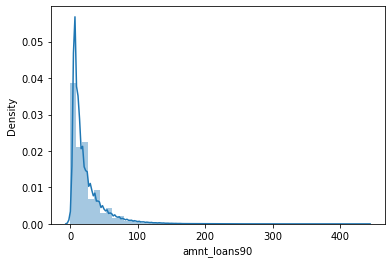

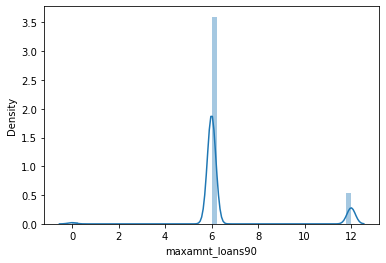

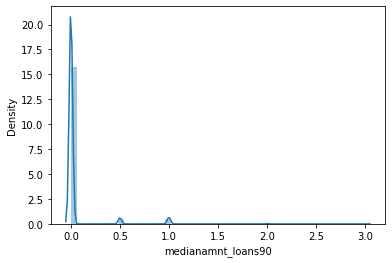

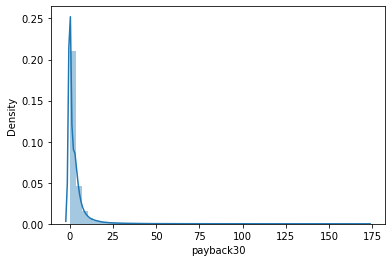

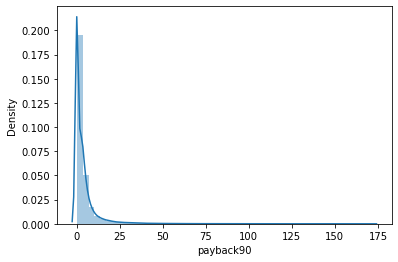

In [46]:
for i in df.columns: 
    sns.distplot(df[i], kde = True)
    plt.show()

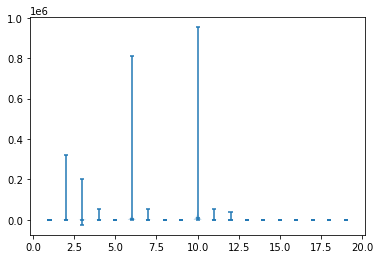

In [47]:
ax = plt.violinplot(df.values, showmedians = True)
plt.show()

In [48]:
# We can see that the outliers are present in only some of the columns. 
# I'll try to fix the skewness and check if that fixes the issue. 

### Handling the Imbalance in the dataset

In [49]:
minor_class = len(df[df['label'] == 0])     
print(minor_class)

26162


In [50]:
major_class = df[df['label'] == 1].index    
print(major_class)

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            209582, 209583, 209585, 209586, 209587, 209588, 209589, 209590,
            209591, 209592],
           dtype='int64', length=183431)


In [51]:
random_samp = np.random.choice(major_class, minor_class, replace = False)        
print(len(random_samp))

26162


In [52]:
min_class = df[df['label'] == 0].index       
print(min_class)

Int64Index([     0,     11,     15,     16,     21,     24,     27,     46,
                74,     76,
            ...
            209525, 209533, 209535, 209537, 209541, 209547, 209549, 209554,
            209571, 209584],
           dtype='int64', length=26162)


In [53]:
under_samp = np.concatenate([min_class, random_samp])

In [54]:
df_samp = df.loc[under_samp]

0    26162
1    26162
Name: label, dtype: int64


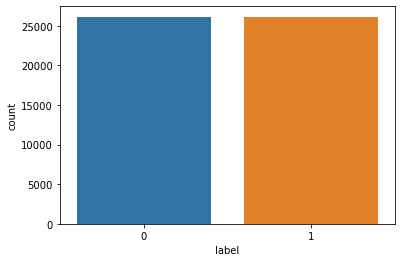

In [55]:
sns.countplot(x = 'label', data = df_samp)         
print(df_samp['label'].value_counts())        
plt.show()

In [56]:
df_samp.shape

(52324, 19)

In [57]:
# The data is perfectly balanced, we don't have to worry about the high imbalance we had earlier. 

In [58]:
df_samp.head()

label  daily_decr90  rental90  last_rech_amt_ma  cnt_ma_rech30  \
0       0   3065.150000    260.13              1539              2   
11      0     65.166667    326.20              7526              2   
15      0     12.000000   1216.80                 0              0   
16      0   1000.000000   1087.88                 0              0   
21      0    515.200000     58.20               773              1   

    sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  fr_ma_rech90  \
0              3078.0                1539.0              2            21   
11             9065.0                4532.5              2             0   
15                0.0                   0.0              0             0   
16                0.0                   0.0              0             0   
21              773.0                 773.0              2            64   

    sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  \
0                3078                1539.0                   7.5   
11               9065                4532.5                 489.0   
15                  0                   0.0                   0.0   
16                  0                   0.0                   0.0   
21               1546                 773.0                 283.5   

    amnt_loans30  medianamnt_loans30  amnt_loans90  maxamnt_loans90  \
0             12                 0.0            12                6   
11             6                 0.0             6                6   
15             6                 0.0             6                6   
16             6                 0.0             6                6   
21            12                 0.0            12                6   

    medianamnt_loans90  payback30  payback90  
0                  0.0       29.0       29.0  
11                 0.0        0.0        0.0  
15                 0.0        0.0        0.0  
16                 0.0        0.0        0.0  
21                 0.0        0.0        0.0

### Handling the skewness

In [59]:
df_samp.skew()

label                    0.000000
daily_decr90             4.932207
rental90                 4.560681
last_rech_amt_ma         4.833118
cnt_ma_rech30            3.050768
sumamnt_ma_rech30       16.284780
medianamnt_ma_rech30     4.450555
cnt_ma_rech90            3.388452
fr_ma_rech90             2.594188
sumamnt_ma_rech90        9.113253
medianamnt_ma_rech90     4.939650
medianmarechprebal90    45.675106
amnt_loans30             3.390249
medianamnt_loans30       5.013040
amnt_loans90             3.770924
maxamnt_loans90          2.359906
medianamnt_loans90       5.363464
payback30                8.340993
payback90                6.985928
dtype: float64

In [60]:
x = df_samp.drop(['label'], axis = 1)
y = df_samp['label']

In [61]:
x = np.cbrt(x)

In [62]:
cols = ['daily_decr90', 'rental90', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'amnt_loans30',
       'medianamnt_loans30', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90']

In [63]:
x = pd.DataFrame(x, columns = cols)
x.head()

daily_decr90   rental90  last_rech_amt_ma  cnt_ma_rech30  \
0      14.526152   6.383568         11.545503       1.259921   
11      4.024159   6.883796         19.596931       1.259921   
15      2.289428  10.675947          0.000000       0.000000   
16     10.000000  10.284748          0.000000       0.000000   
21      8.016632   3.875321          9.177544       1.000000   

    sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  fr_ma_rech90  \
0           14.546423             11.545503       1.259921      2.758924   
11          20.850794             16.549286       1.259921      0.000000   
15           0.000000              0.000000       0.000000      0.000000   
16           0.000000              0.000000       0.000000      0.000000   
21           9.177544              9.177544       1.259921      4.000000   

    sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  \
0           14.546423             11.545503              1.957434   
11          20.850794             16.549286              7.878368   
15           0.000000              0.000000              0.000000   
16           0.000000              0.000000              0.000000   
21          11.562981              9.177544              6.569279   

    amnt_loans30  medianamnt_loans30  amnt_loans90  maxamnt_loans90  \
0       2.289428                 0.0      2.289428         1.817121   
11      1.817121                 0.0      1.817121         1.817121   
15      1.817121                 0.0      1.817121         1.817121   
16      1.817121                 0.0      1.817121         1.817121   
21      2.289428                 0.0      2.289428         1.817121   

    medianamnt_loans90  payback30  payback90  
0                  0.0   3.072317   3.072317  
11                 0.0   0.000000   0.000000  
15                 0.0   0.000000   0.000000  
16                 0.0   0.000000   0.000000  
21                 0.0   0.000000   0.000000

In [64]:
x.skew()

daily_decr90            0.910050
rental90                0.258058
last_rech_amt_ma       -0.325189
cnt_ma_rech30          -0.219301
sumamnt_ma_rech30       0.090082
medianamnt_ma_rech30   -0.293874
cnt_ma_rech90          -0.101965
fr_ma_rech90            0.708009
sumamnt_ma_rech90       0.206081
medianamnt_ma_rech90   -0.397068
medianmarechprebal90    0.604028
amnt_loans30            0.958484
medianamnt_loans30      4.005268
amnt_loans90            1.316081
maxamnt_loans90        -3.711579
medianamnt_loans90      4.300490
payback30               1.339980
payback90               1.191736
dtype: float64

### Checking outliers once again

In [65]:
z = np.abs(zscore(x))
threshold = 3
print(np.where(z>3))

(array([    5,    13,    28, ..., 52320, 52322, 52322], dtype=int64), array([ 1, 10, 12, ..., 13, 12, 15], dtype=int64))


In [66]:
xn = x[(z<3).all(axis=1)]
print(x.shape)
print(xn.shape)

(52324, 18)
(46047, 18)


In [67]:
# percentage of data loss.
data_loss = ((52324-45994)/52324)*100
data_loss

12.097698952679458

In [68]:
# Still there are 12% outliers, removing which will cause a significant data loss. 

In [69]:
from scipy.stats import norm
from scipy import stats

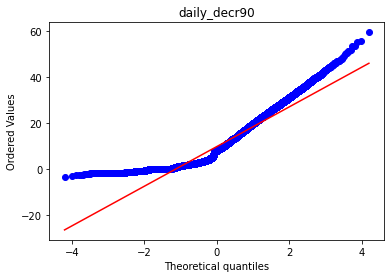

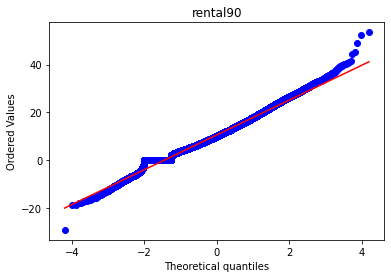

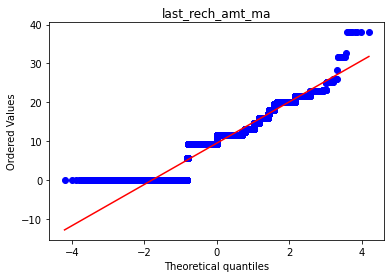

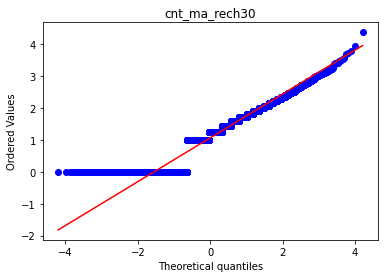

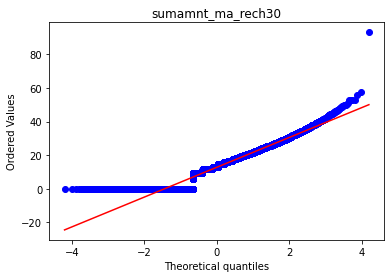

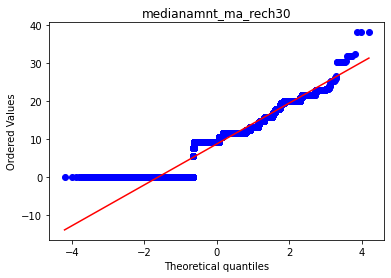

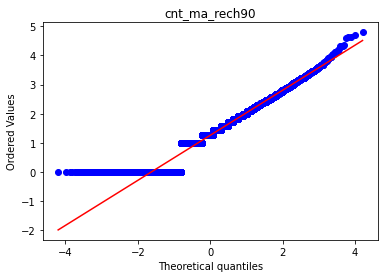

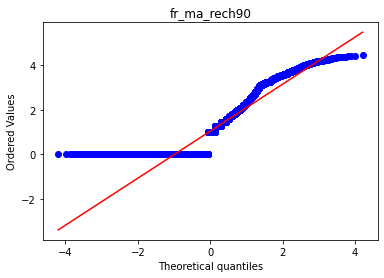

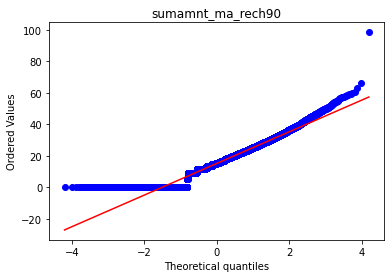

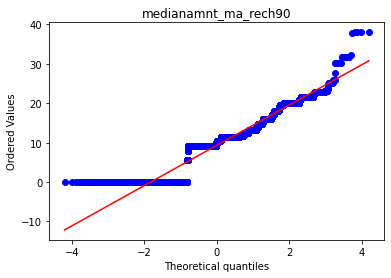

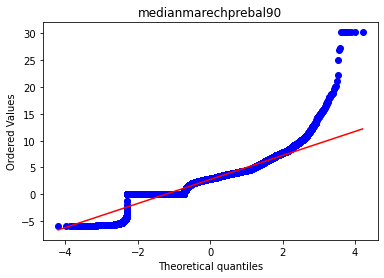

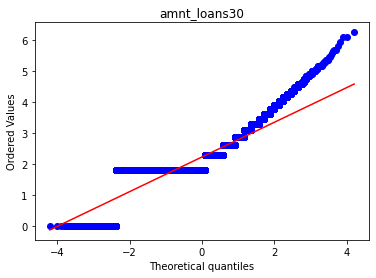

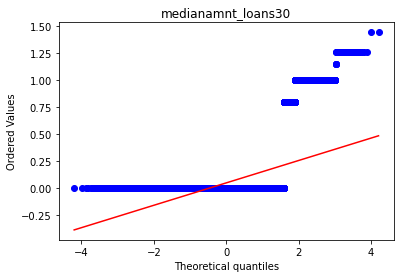

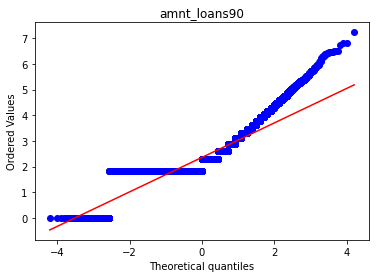

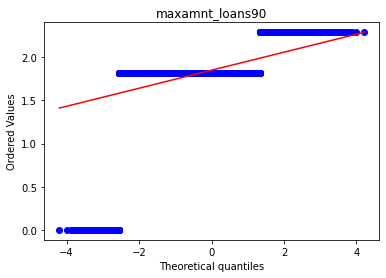

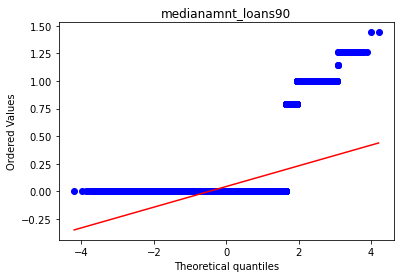

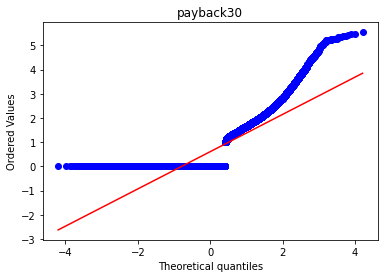

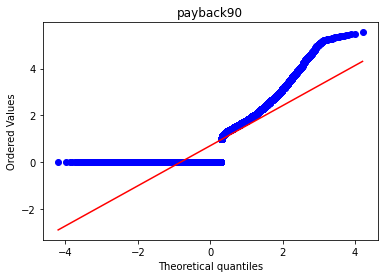

In [70]:
for i in x:
    res = stats.probplot(x[i], plot=plt)
    plt.title(i)
    plt.show()

### Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
ss = StandardScaler()

In [73]:
x = ss.fit_transform(x)

In [74]:
x = pd.DataFrame(x, columns = cols)
x.head()

daily_decr90  rental90  last_rech_amt_ma  cnt_ma_rech30  sumamnt_ma_rech30  \
0      0.515769 -0.575017          0.360677       0.260391           0.191488   
1     -0.646282 -0.506612          1.780196       0.260391           0.875454   
2     -0.838231  0.011952         -1.674870      -1.475120          -1.386665   
3      0.014948 -0.041543         -1.674870      -1.475120          -1.386665   
4     -0.204513 -0.918012         -0.056809      -0.097644          -0.390986   

   medianamnt_ma_rech30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0              0.486539      -0.002489      1.473000          -0.055978   
1              1.354015      -0.002489     -0.907473           0.555992   
2             -1.515036      -1.576595     -0.907473          -1.468008   
3             -1.515036      -1.576595     -0.907473          -1.468008   
4              0.076020      -0.002489      2.543833          -0.345582   

   medianamnt_ma_rech90  medianmarechprebal90  amnt_loans30  \
0              0.406619             -0.347765      0.083297   
1              1.319748              2.179571     -0.665612   
2             -1.700295             -1.183291     -0.665612   
3             -1.700295             -1.183291     -0.665612   
4             -0.025505              1.620789      0.083297   

   medianamnt_loans30  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0           -0.239843     -0.088376        -0.172648           -0.224923   
1           -0.239843     -0.713575        -0.172648           -0.224923   
2           -0.239843     -0.713575        -0.172648           -0.224923   
3           -0.239843     -0.713575        -0.172648           -0.224923   
4           -0.239843     -0.088376        -0.172648           -0.224923   

   payback30  payback90  
0   2.657322   2.356427  
1  -0.661017  -0.714046  
2  -0.661017  -0.714046  
3  -0.661017  -0.714046  
4  -0.661017  -0.714046

### Importing the models

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [76]:
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
abc = AdaBoostClassifier()

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 100)

In [78]:
x_train.shape

(36626, 18)

In [79]:
x_test.shape

(15698, 18)

In [80]:
y_train.shape

(36626,)

In [81]:
y_test.shape

(15698,)

In [82]:
# Defining Models

In [107]:
def model(m):
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    print('Accuracy Score  : ', m)
    print(accuracy_score(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('F1 Score: ', f1_score(y_test, pred))
    pass

In [84]:
def model_cross_val(m):
    print(m)
    i = []
    for a in range (2,10):
        score = cross_val_score(m, x, y, cv = a)
        k = score.mean()
        i.append(k)
    print(i)
    print('CV Value = ', i.index(max(i))+2)
    print('Best Score =' , max(i))
    print('\n')
    pass

In [85]:
def auc_roc_curve(m):
    y_pred_prob = m.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label = m)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(m)
    plt.show()
    print('\n')
    auc_score = roc_auc_score(y_test, m.predict(x_test))
    print(auc_score)
    pass

### Linear Regression

In [86]:
model(lr)

Accuracy Score  :  LogisticRegression()
0.7567206013504905
[[6099 1713]
 [2106 5780]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      7812
           1       0.77      0.73      0.75      7886

    accuracy                           0.76     15698
   macro avg       0.76      0.76      0.76     15698
weighted avg       0.76      0.76      0.76     15698

0.7516743611418168


In [87]:
model_cross_val(lr)

LogisticRegression()
[0.7612567846494916, 0.7609893055708934, 0.7612950080269092, 0.760970056734915, 0.7608745319130209, 0.761275909696056, 0.760970208732778, 0.760645229477765]
CV Value =  4
Best Score = 0.7612950080269092




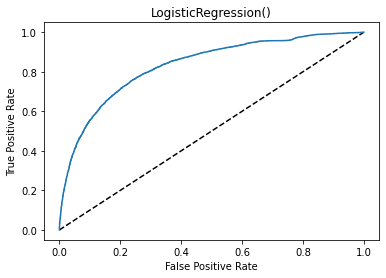



0.7568332123699739


In [88]:
auc_roc_curve(lr)

In [125]:
# RandomizedSearchCV
parameters = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
model_lr = LogisticRegression()
rs_cv = RandomizedSearchCV(model_lr,parameters,cv=4)
rs_cv_result = rs_cv.fit(x_train, y_train)

print(rs_cv.best_params_)
print('Best Score: ', rs_cv_result.best_score_)

{'penalty': 'l2', 'C': 100.0}
Best Score:  0.7634467609426607


In [132]:
# Running the model with the best parameters
lr_final = LogisticRegression(penalty = 'l2', C = 100.0)
lr_final.fit(x_train, y_train)
pred = lr_final.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('F1 Score: ', f1_score(y_test, pred))

0.7567843037329596
[[6099 1713]
 [2105 5781]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      7812
           1       0.77      0.73      0.75      7886

    accuracy                           0.76     15698
   macro avg       0.76      0.76      0.76     15698
weighted avg       0.76      0.76      0.76     15698

F1 Score:  0.7517555266579974


### Gaussian NB

In [89]:
model(gnb)

Accuracy Score  :  GaussianNB()
0.751560708370493
[[6005 1807]
 [2093 5793]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      7812
           1       0.76      0.73      0.75      7886

    accuracy                           0.75     15698
   macro avg       0.75      0.75      0.75     15698
weighted avg       0.75      0.75      0.75     15698

0.7481596280511431


In [90]:
model_cross_val(gnb)

GaussianNB()
[0.753287210457916, 0.7533063431508958, 0.7532298753917895, 0.7532871129336028, 0.7533062571381182, 0.7532298226142393, 0.7534019799598579, 0.7533062697441957]
CV Value =  8
Best Score = 0.7534019799598579




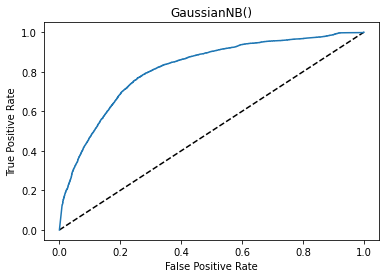



0.7516410728196825


In [91]:
auc_roc_curve(gnb)

In [126]:
# RandomizedSearchCV
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
model_gnb = GaussianNB()
gnb_cv = RandomizedSearchCV(model_gnb,parameters,cv=8)
gnb_cv_result = gnb_cv.fit(x_train, y_train)

print(gnb_cv.best_params_)
print('Best Score: ', gnb_cv_result.best_score_)

{'var_smoothing': 0.02310129700083159}
Best Score:  0.7538088852932896


In [133]:
# Running the model with the best parameters
gnb_final = GaussianNB(var_smoothing = 0.02310129700083159)
gnb_final.fit(x_train, y_train)
pred = gnb_final.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('F1 Score: ', f1_score(y_test, pred))

0.7518792202828386
[[6006 1806]
 [2089 5797]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      7812
           1       0.76      0.74      0.75      7886

    accuracy                           0.75     15698
   macro avg       0.75      0.75      0.75     15698
weighted avg       0.75      0.75      0.75     15698

F1 Score:  0.7485312157014655


### Random Forest Classifier

In [108]:
model(rfc)

Accuracy Score  :  RandomForestClassifier()
0.7990826856924449
[[6051 1761]
 [1393 6493]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      7812
           1       0.79      0.82      0.80      7886

    accuracy                           0.80     15698
   macro avg       0.80      0.80      0.80     15698
weighted avg       0.80      0.80      0.80     15698

F1 Score:  0.8045848822800497


In [109]:
model_cross_val(rfc)

RandomForestClassifier()
[0.7989259230945647, 0.7996330766149033, 0.8022513569298984, 0.8021939594775654, 0.8024232760776039, 0.8018881880181924, 0.8016780065706457, 0.8026144849464596]
CV Value =  9
Best Score = 0.8026144849464596




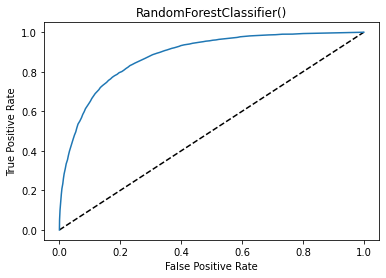



0.798967711158977


In [110]:
auc_roc_curve(rfc)

In [127]:
# RandomizedSearchCV
parameters = {'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
model_rfc = RandomForestClassifier()
rfc_cv = RandomizedSearchCV(model_rfc,parameters,cv=9)
rfc_cv_result = rfc_cv.fit(x_train, y_train)

print(rfc_cv.best_params_)
print('Best Score: ', rfc_cv_result.best_score_)

{'n_estimators': 25, 'max_features': 10, 'max_depth': 10, 'bootstrap': False}
Best Score:  0.8040736820289536


In [134]:
# Running the model with the best parameters
rfc_final = RandomForestClassifier(n_estimators = 25, max_features = 10, max_depth = 10, bootstrap = False)
rfc_final.fit(x_train, y_train)
pred = rfc_final.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('F1 Score: ', f1_score(y_test, pred))

0.7990189833099758
[[6082 1730]
 [1425 6461]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      7812
           1       0.79      0.82      0.80      7886

    accuracy                           0.80     15698
   macro avg       0.80      0.80      0.80     15698
weighted avg       0.80      0.80      0.80     15698

F1 Score:  0.8037569198233502


### Decision Tree Classifier

In [111]:
model(dtc)

Accuracy Score  :  DecisionTreeClassifier()
0.733214422219391
[[5744 2068]
 [2120 5766]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      7812
           1       0.74      0.73      0.73      7886

    accuracy                           0.73     15698
   macro avg       0.73      0.73      0.73     15698
weighted avg       0.73      0.73      0.73     15698

F1 Score:  0.7335877862595419


In [112]:
model_cross_val(dtc)

DecisionTreeClassifier()
[0.7347870957877838, 0.7377494643250239, 0.7355706750248452, 0.7373861210588374, 0.7366025081993023, 0.7370803630640049, 0.7357617085502082, 0.7365834613090284]
CV Value =  3
Best Score = 0.7377494643250239




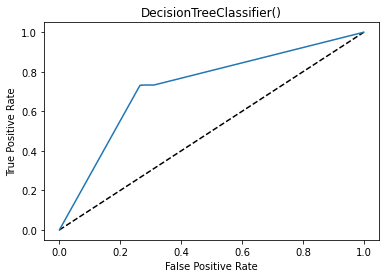



0.7332241091986824


In [113]:
auc_roc_curve(dtc)

In [128]:
# RandomizedSearchCV
parameters = {'criterion':['gini','entropy'],'max_depth':np.arange(3, 10)}
model_dtc = DecisionTreeClassifier()
dtc_cv = RandomizedSearchCV(model_dtc,parameters,cv=3)
dtc_cv_result = dtc_cv.fit(x_train, y_train)

print(dtc_cv.best_params_)
print('Best Score: ', dtc_cv_result.best_score_)

{'max_depth': 9, 'criterion': 'gini'}
Best Score:  0.7814939860234597


In [135]:
# Running the model with the best parameters
dtc_final = DecisionTreeClassifier(max_depth = 9, criterion = 'gini')
dtc_final.fit(x_train, y_train)
pred = dtc_final.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('F1 Score: ', f1_score(y_test, pred))

0.778379411389986
[[6096 1716]
 [1763 6123]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      7812
           1       0.78      0.78      0.78      7886

    accuracy                           0.78     15698
   macro avg       0.78      0.78      0.78     15698
weighted avg       0.78      0.78      0.78     15698

F1 Score:  0.7787599364069951


### K Neighbors Classifier

In [114]:
model(knc)

Accuracy Score  :  KNeighborsClassifier()
0.7711810421709772
[[5955 1857]
 [1735 6151]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      7812
           1       0.77      0.78      0.77      7886

    accuracy                           0.77     15698
   macro avg       0.77      0.77      0.77     15698
weighted avg       0.77      0.77      0.77     15698

F1 Score:  0.7740027683402542


In [115]:
model_cross_val(knc)

KNeighborsClassifier()
[0.7698952679458757, 0.7699144769881677, 0.7704877302958489, 0.7709081531418986, 0.7718063331436263, 0.7716916602495595, 0.7734882202685764, 0.7739277925599215]
CV Value =  9
Best Score = 0.7739277925599215




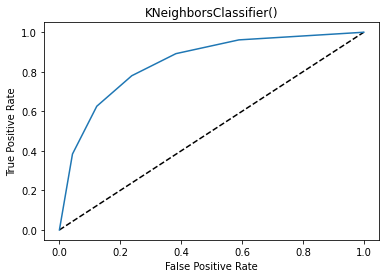



0.7711393209611775


In [116]:
auc_roc_curve(knc)

In [129]:
# RandomizedSearchCV
parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}
model_knc = KNeighborsClassifier()
knc_cv = RandomizedSearchCV(model_knc,parameters,cv=9)
knc_cv_result = knc_cv.fit(x_train, y_train)

print(knc_cv.best_params_)
print('Best Score: ', knc_cv_result.best_score_)

{'n_neighbors': 7, 'n_jobs': -1, 'leaf_size': 3, 'algorithm': 'kd_tree'}
Best Score:  0.7760880744906304


In [136]:
# Running the model with the best parameters
knc_final = KNeighborsClassifier(n_neighbors = 7, n_jobs = -1, leaf_size = 3, algorithm = 'kd_tree')
knc_final.fit(x_train, y_train)
pred = knc_final.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('F1 Score: ', f1_score(y_test, pred))

0.7771053637406039
[[5999 1813]
 [1686 6200]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      7812
           1       0.77      0.79      0.78      7886

    accuracy                           0.78     15698
   macro avg       0.78      0.78      0.78     15698
weighted avg       0.78      0.78      0.78     15698

F1 Score:  0.7799232656141896


### Ada Boost Classifier

In [117]:
model(abc)

Accuracy Score  :  AdaBoostClassifier()
0.7851955663141802
[[6253 1559]
 [1813 6073]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      7812
           1       0.80      0.77      0.78      7886

    accuracy                           0.79     15698
   macro avg       0.79      0.79      0.79     15698
weighted avg       0.79      0.79      0.79     15698

F1 Score:  0.7827039566954505


In [118]:
model_cross_val(abc)

AdaBoostClassifier()
[0.7827765461356166, 0.7818018973345299, 0.7825280941824019, 0.7822030658478604, 0.7820692837107659, 0.781496086257171, 0.7826618688891102, 0.7816488432406243]
CV Value =  2
Best Score = 0.7827765461356166




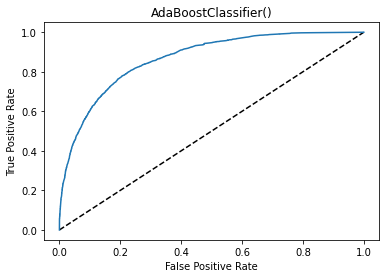



0.7852670686571924


In [119]:
auc_roc_curve(abc)

In [131]:
# RandomizedSearchCV
parameters = {'n_estimators':[10, 50, 100, 500], 'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0], 'algorithm':['SAMME', 'SAMME.R']}
model_abc = AdaBoostClassifier()
abc_cv = RandomizedSearchCV(model_abc,parameters,cv=2)
abc_cv_result = abc_cv.fit(x_train, y_train)

print(abc_cv.best_params_)
print('Best Score: ', abc_cv_result.best_score_)

{'n_estimators': 500, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
Best Score:  0.7831868071861519


In [137]:
# Running the model with the best parameters
abc_final = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.1, algorithm = 'SAMME.R')
abc_final.fit(x_train, y_train)
pred = abc_final.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('F1 Score: ', f1_score(y_test, pred))

0.7813734233660339
[[6221 1591]
 [1841 6045]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      7812
           1       0.79      0.77      0.78      7886

    accuracy                           0.78     15698
   macro avg       0.78      0.78      0.78     15698
weighted avg       0.78      0.78      0.78     15698

F1 Score:  0.778894472361809


### We can conclude that the random forest classifer is the bestmodel with an accuracy of 80%